<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
pd.options.display.max_columns = 5
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-train.csv', header = None)
# df_train = df_train.drop(columns='Unnamed: 0')      # Dropping the row containing indices by default
df_train.head()

,0,1,...,783,784
0,23,0,...,0,0
1,7,0,...,0,0
2,16,0,...,0,0
3,15,0,...,0,0
4,23,0,...,0,0


In [23]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-test.csv', header = None)
# df_test = df_test.drop(columns=['Unnamed: 0'])      # Dropping the row containing indices by default
df_test.head()

,0,1,...,783,784
0,1,0,...,0,0
1,1,0,...,0,0
2,1,0,...,0,0
3,1,0,...,0,0
4,1,0,...,0,0


In [24]:
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

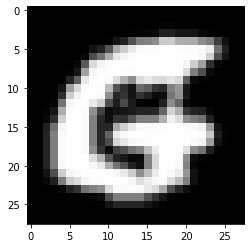

In [25]:
n=df_train.shape[1]
pixels=(df_train.iloc[1:2,1:n]).to_numpy() #Visualisation of second training example
pixels = pixels.reshape((28, 28))
pixels = pixels.T
plt.imshow(pixels, cmap='gray')
plt.show()

In [26]:
X_train = df_train.to_numpy()
Y_train = X_train[:, 0]
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_train = X_train[:, 1:X_train.shape[1]]
# print(Y_train[4])
# print(X_train.shape)

In [27]:
X_test = df_test.to_numpy()
Y_test = X_test[:, 0]
Y_test = Y_test.reshape(Y_test.shape[0],1)
X_test = X_test[:, 1:X_test.shape[1]]
print(Y_test[8888][0])
# print(X_test.shape)

12


In [28]:
def plot(X):
    pixels = X.reshape((28, 28))
    pixels = pixels.T
    plt.imshow(pixels, cmap='gray')
    plt.show()

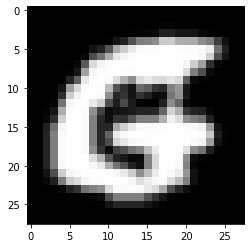

This is G


In [29]:
n=X_train.shape[1]
a = 1
pixels= X_train[a:a+1, :]           #Visualisation of (a+1)th training example
plot(pixels)
print('This is', alphabets[Y_train[a]-1][0])

In [30]:
print(np.unique(Y_train).shape)
print(np.unique(Y_test))
print(Y_test[14799][0])
# for i in np.unique(Y_train):
#     print(i)

(26,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
19


In [31]:
def normalise(X):
    mu = np.mean(X, axis = 0)       # Mean (Column wise)
    # print(mu)
    sigma = np.std(X, axis = 0)     # Standard Deviation (Column wise)
    # print(sigma)
    X = X-mu
    X = X/sigma
    return X

In [32]:
from sklearn.preprocessing import normalize

X_train = normalize(X_train, axis=0)

In [33]:
def sigmoid(X):
    result = 1/(1+np.exp(-X))
    return result

In [34]:
def cost_function(X, Y, theta):
    m = Y.shape[0]                      # No. of training examples
    Y_pred = sigmoid(np.dot(X, theta.T))
    result = (np.sum(-np.dot(Y.T, np.log(Y_pred + 10**(-7))) - np.dot((1-Y).T, np.log(1-Y_pred + 10**(-7))), axis = 1))
    result = result.reshape(result.shape[0], 1)
    return result

In [35]:
def gradient_descent(X, Y, theta, learning_rate):
    m = Y.shape[0]                      # No. of training examples
    Y_pred = sigmoid(np.dot(X, theta.T))
    grad = np.dot((Y_pred-Y).T, X)/m
    theta -= learning_rate*grad
    return theta

In [36]:
global theta
learning_rate = 0.01
no_of_iterations = 1500
# cost_arr = np.zeros((np.unique(Y_train).shape[0], no_of_iterations))
X_train_new = X_train
extra_column = np.ones((X_train_new.shape[0], 1))
X_train_new = np.c_[extra_column, X_train_new]
# theta = np.zeros((np.unique(Y_train).shape[0], X_train_new.shape[1]))
m = len(Y_train)                # No. of training examples

In [37]:
Y_onevsall = np.empty((X_train.shape[0], 0))
print(Y_onevsall.shape)

for i in np.unique(Y_train):
    Y_class = np.where(Y_train==i, 1, 0)
    Y_onevsall = np.concatenate((Y_onevsall, Y_class), axis=1)

print(Y_onevsall.shape)
# print(Y_onevsall[0])

(88800, 0)
(88800, 26)


In [38]:
cost_arr = np.empty((len(np.unique(Y_train)), 0))
theta = np.zeros((Y_onevsall.shape[1], X_train_new.shape[1]))

In [ ]:
for i in range(no_of_iterations):
    cost_arr = np.concatenate((cost_arr, cost_function(X_train_new, Y_onevsall, theta)), axis = 1)
    theta = gradient_descent(X_train_new, Y_onevsall, theta, learning_rate)

In [ ]:
def predict(X):
    extra_column = np.ones((X.shape[0], 1))
    X = np.c_[extra_column, X]
    result = np.dot(X, theta.T)
    result = sigmoid(result)
    return result

In [ ]:
a = 1478
eld = predict(normalize(X_train, axis=0))
el = eld[a, :]
print(el)
ind = np.argmax(el)
print(ind)
print(alphabets[ind][0])
print(Y_train[a])

In [ ]:
pred = np.zeros((Y_test.shape[0], 1))
score = 0
eld = predict(X_test)
for i in range(X_test.shape[0]):
    el = eld[i, :]
    ind = np.argmax(el)
    if Y_test[i][0]==ind+1:
        score+=1
    
print(score)

In [ ]:
arr = np.array([[0], [1]])
print(sigmoid(arr))

In [ ]:
print(theta[0, 45:98])